In [103]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()
olivetti.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [104]:
X, y = olivetti["data"], olivetti["target"]
y[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4])

In [105]:
from sklearn.model_selection import StratifiedShuffleSplit

# StratifiedShuffleSplitオブジェクトの作成
# n_splits: 分割数（トレーニングセットとテストセットのペアの数）
# test_size: テストセットの割合（0から1の間の値）
# random_state: 乱数のシード値（再現性のために指定する場合に使用）
sss_1 = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)

# データセットをトレーニングセットとテストセットに分割
for train__valid_index, test_index in sss_1.split(X, y):
    X_train_valid, X_test = X[train__valid_index], X[test_index]
    y_train_valid, y_test = y[train__valid_index], y[test_index]

In [106]:
sss_1 = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=42)

# データセットをトレーニングセットとテストセットに分割
for train_index, valid_index in sss_1.split(X_train_valid, y_train_valid):
    X_train, X_valid = X_train_valid[train_index], X_train_valid[valid_index]
    y_train, y_valid = y_train_valid[train_index], y_train_valid[valid_index]

In [107]:
len(X_train), len(X_test), len(X_valid)

(280, 40, 80)

In [108]:
# dimensionality reduced to speed it up
from sklearn.decomposition import PCA
pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

200

In [109]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=20, n_init=10, random_state=42)
y_pred = gm.fit_predict(X_train_pca)

F:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
F:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
F:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
F:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

In [110]:
n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)

In [111]:
y_gen_faces

array([ 1,  1,  1,  2,  3,  7,  7,  7,  7,  8,  9, 11, 11, 12, 15, 16, 17,
       17, 18, 19])

In [112]:
gen_faces.shape

(20, 4096)

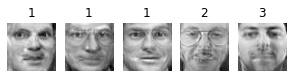

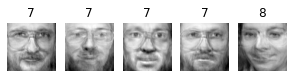

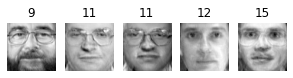

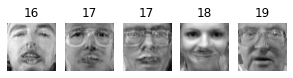

In [113]:
import matplotlib.pyplot as plt
def plot_faces(gen_faces, n_gen_faces, y_gen_faces = y_gen_faces): 
    n=0
    plot=0
    for i in range(int(n_gen_faces/5)):
        n +=1
        plt.figure(figsize=(5, 4*1.1))
        for j in range(5):
            plt.subplot(n,5,j+1)
            plt.imshow(gen_faces[plot].reshape(64, 64), cmap="gray")
            plt.axis("off")
            plt.title(y_gen_faces[plot])
            plot += 1
        plt.show()
plot_faces(gen_faces, n_gen_faces)

In [114]:
# rotate, darken and flip some images
import numpy as np
n_rotated = 4
rotated = np.transpose( X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
#行と列を入れ替えて90度回転
y_rotated = y_train[:n_rotated]

In [115]:
rotated.shape

(4, 4096)

In [116]:
#もう９０度回転すると flipになるが、numpyは逆順をとる記法がある
n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1] #　[start: stop: step]なので
                                    # ::n は最初から最後まで3つずつスキップ取得すること
                                    # ::-nは逆向きにとる
flipped = flipped.reshape(-1 , 64*64)
y_flipped = y_train[:n_flipped]

In [117]:
n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] = darkened[:, 1:-1]*0.2
#　1:-1を指定して第２列から後ろから二番目のれつだけ
#  取り出して画像の左右の端に影響を受けないようにする
#  0から２５５は黒から白なので*0.3は黒くする意味
y_darkened = y_train[:n_darkened]

In [118]:
darkend.shape

(3, 4096)

In [119]:
X_bad_faces = np.r_[rotated, flipped, darkened]

In [120]:
X_bad_faces.shape

(10, 4096)

In [121]:
y_bad = np.r_[y_rotated, y_flipped, y_darkened]

In [122]:
y_bad

array([23, 10, 18,  6, 23, 10, 18, 23, 10, 18])

In [123]:
y_bad_conce = np.concatenate([y_rotated, y_flipped, y_darkened])
y_bad_conce
# this time r_ = concatenate
# while concatenate can use axis=n to designate axis

array([23, 10, 18,  6, 23, 10, 18, 23, 10, 18])

In [124]:
y_bad_faces = np.r_[y_train[:n_rotated], y_train[:n_flipped], y_train[:n_darkened]]

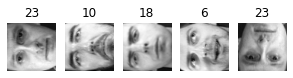

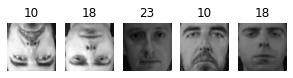

In [125]:
plot_faces(X_bad_faces, n_rotated+ n_flipped +n_darkened, y_gen_faces =y_bad_faces )

(-0.5, 63.5, 63.5, -0.5)

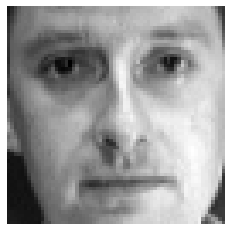

In [126]:
plt.imshow(X_train[0].reshape(64,64), cmap="gray")
plt.axis("off")

In [127]:
# detect bad_faces with Gaussian_Mixture
X_bad_faces_pca = pca.transform(X_bad_faces)
gm.score_samples(X_bad_faces_pca)

array([-4.55471340e+07, -3.11225458e+07, -2.79841230e+07, -3.65614781e+07,
       -3.08244261e+07, -4.05388521e+07, -3.04354784e+07, -1.21399387e+08,
       -1.06916095e+08, -1.06260246e+08])

In [128]:
# score_samples give density score( the log of the probability density function)
# .score_samples give the density at that location (higher → denser)

# all bad faces are considered far away from normal pictures compared with

gm.score_samples(X_train_pca[:10])

array([1124.44896834, 1103.92407691, 1103.92407508, 1002.00341923,
       1061.94493097, 1046.64029657, 1123.08002275, 1021.23746383,
       1021.23728964, 1145.77253233])

In [129]:
# Dimensionality Reduction Techniques for anomaly Detection
X_train_pca[:10]

array([[ 2.2095604e+00,  8.1778603e+00, -3.1609116e+00, ...,
         1.0566127e-01,  1.1277877e-01, -1.2377025e-01],
       [-2.8795352e+00, -5.8527212e+00, -3.1102655e+00, ...,
        -1.9481592e-01, -7.9050452e-02,  9.7049788e-02],
       [-3.7209990e+00, -3.7166858e+00, -1.6136043e+00, ...,
         1.0774248e-01,  6.8562113e-02,  2.0837966e-02],
       ...,
       [-6.1597288e-01,  6.4195889e-01,  8.9062530e-01, ...,
         3.2128606e-02, -8.7918483e-02, -2.0530143e-01],
       [ 1.6723099e+00,  3.4203587e+00,  3.3280361e+00, ...,
        -1.7067626e-01,  3.7983793e-01, -1.5688705e-03],
       [-7.6563020e+00,  1.4593406e+00, -3.9141717e+00, ...,
         1.2130303e-01,  1.7662178e-01,  6.2292233e-02]], dtype=float32)

In [136]:
def reconstruction_errors(pca, X):
    X_pca = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square(X_reconstructed - X).mean(axis=1)
    return mse

In [138]:
reconstruction_errors(pca, X_train).mean()

0.00018892145

In [139]:
reconstruction_errors(pca, X_bad_faces).mean()

0.0062943576

In [ ]:
# 十倍以上の差があるので、あるthresholdを決めて一部のbaddataを削除することが
# 可能

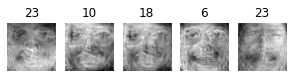

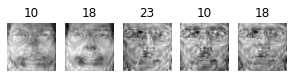

In [142]:
X_bad_faces_pca = pca.transform(X_bad_faces)
X_bad_faces_reconstructed = pca.inverse_transform(X_bad_faces_pca)
plot_faces(X_bad_faces_reconstructed, n_rotated+ n_flipped +n_darkened, y_gen_faces =y_bad_faces )